In [144]:
#import tools
import pandas as pd
import numpy as np

In [162]:
# read the data set
ML_df = pd.read_csv("ML_data.csv")
ML_df.head(5)

,air_quality_annual_PM2p5,median_household_income,percent_diagnosed_diabetes,percent_EDU_less_col,percent_EDU_less_HS,percent_food_stamp,percent_high_BP,percent_high_chol,percent_obisity,percent_phys_inactivity,...,ovay_range,pancreas_range,prostate_range,stomach_range,thyroid_range,uteras_range,Pediatric Asthma,Adult Asthma,COPD,Adult Chronic Lung Disease
0,5.7,90000.0,7.6,78.1,6.4,10.3,32.1,31.9,31.4,21.4,...,7.5,11.0,24.4,7.8,5.9,12.2,0.029035,0.085289,0.044459,0.143359
1,9.0,68000.0,8.2,81.9,8.8,6.6,34.4,35.2,25.7,21.4,...,0.0,10.2,30.7,0.0,0.0,18.2,1.027867,8.000898,6.039967,13.349799
2,7.6,55000.0,7.4,71.7,10.3,12.8,29.3,29.9,32.5,20.7,...,5.3,5.4,15.8,5.2,3.8,7.6,1.377242,7.485993,4.571692,12.093878
3,8.0,66000.0,7.0,80.2,10.3,10.3,35.8,36.1,26.8,15.5,...,13.3,9.2,27.4,0.0,0.0,19.2,1.153148,7.836659,6.128531,13.382137
4,6.6,59000.0,7.2,85.1,27.2,6.3,28.0,29.8,23.9,19.2,...,0.0,0.0,45.4,0.0,0.0,0.0,1.841544,6.865201,4.077373,11.591984


In [163]:
# features (feat_list) and targets (tar_list)
tar_list = ['cardio_death', 'total_cancer', 'bladder', 'brain',
       'breast', 'breast_insitu', 'cervix', 'colon', 'esophagus',
       'kidney and renal', 'leukemia', 'liver', 'lung', 'melanoma',
       'non-hudgkin lymphoma', 'oral cavity', 'ovay', 'pancreas', 'prostate',
       'stomach', 'thyroid', 'uteras','Pediatric Asthma', 'Adult Asthma',
       'COPD', 'Adult Chronic Lung Disease']
feat_list=['air_quality_annual_PM2p5', 'median_household_income',
       'percent_diagnosed_diabetes', 'percent_EDU_less_col',
       'percent_EDU_less_HS', 'percent_food_stamp', 'percent_high_BP',
       'percent_high_chol', 'percent_obisity', 'percent_phys_inactivity',
       'percent_poverty', 'percent_somker_status', 'unemployment_rate',
       'distance', 'plant_capacity',
       'nameplate_capacity_MW1', 'NOx_tons1', 'SO2_tons1', 'CO2_tons1',
       'CH4_lbs1', 'N2O_lbs1', 'PM2.5_tons1', 'dist_from_county1',
       'nameplate_capacity_MW2', 'NOx_tons2', 'SO2_tons2', 'CO2_tons2',
       'CH4_lbs2', 'N2O_lbs2', 'PM2.5_tons2', 'dist_from_county2',
       'nameplate_capacity_MW3', 'NOx_tons3', 'SO2_tons3', 'CO2_tons3',
       'CH4_lbs3', 'N2O_lbs3', 'PM2.5_tons3', 'dist_from_county3',
       'nameplate_capacity_MW4', 'NOx_tons4', 'SO2_tons4', 'CO2_tons4',
       'CH4_lbs4', 'N2O_lbs4', 'PM2.5_tons4', 'dist_from_county4',
       'nameplate_capacity_MW5', 'NOx_tons5', 'SO2_tons5', 'CO2_tons5',
       'CH4_lbs5', 'N2O_lbs5', 'PM2.5_tons5', 'dist_from_county5',
       'fuel_type1_Biomass', 'fuel_type1_Coal', 'fuel_type1_Gas',
       'fuel_type1_Oil', 'fuel_type1_Other Fossil', 'fuel_type2_Biomass',
       'fuel_type2_Coal', 'fuel_type2_Gas', 'fuel_type2_Oil',
       'fuel_type2_Other Fossil', 'fuel_type3_Biomass', 'fuel_type3_Coal',
       'fuel_type3_Gas', 'fuel_type3_Oil', 'fuel_type3_Other Fossil',
       'fuel_type4_Biomass', 'fuel_type4_Coal', 'fuel_type4_Gas',
       'fuel_type4_Oil', 'fuel_type4_Other Fossil', 'fuel_type5_Biomass',
       'fuel_type5_Coal', 'fuel_type5_Gas', 'fuel_type5_Oil',
       'fuel_type5_Other Fossil']
ML_df = ML_df[feat_list+tar_list]

<Axes: >

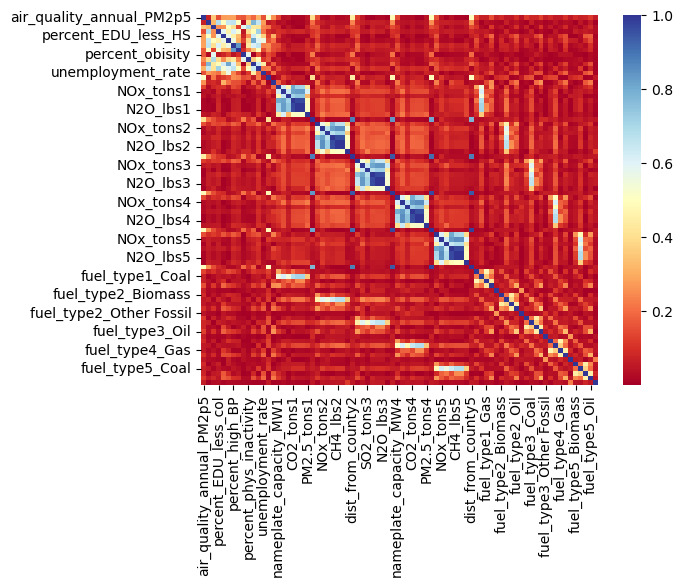

In [147]:
# visualize correlations between features
corr_df = ML_df[feat_list].corr()
%matplotlib inline
import seaborn as sns
sns.heatmap(corr_df.abs(),cmap="RdYlBu")

The Heat map indicates that there are several highly correlated features

In [148]:
#Which features are correlated?
def proc_data(df,cut_off=0.95):
    # 1. drop the high correlation columns
    high_corr={}
    for i in range(len(feat_list)-1):
        high_corr[feat_list[i]] = []
        for j in range(i+1, len(feat_list)):
            if (abs(df[feat_list[i]].corr(df[feat_list[j]])) >= cut_off):
                high_corr[feat_list[i]].append(feat_list[j])
    return(high_corr)
proc_data(ML_df)

{'air_quality_annual_PM2p5': [],
 'median_household_income': [],
 'percent_diagnosed_diabetes': [],
 'percent_EDU_less_col': [],
 'percent_EDU_less_HS': [],
 'percent_food_stamp': [],
 'percent_high_BP': [],
 'percent_high_chol': [],
 'percent_obisity': [],
 'percent_phys_inactivity': [],
 'percent_poverty': [],
 'percent_somker_status': [],
 'unemployment_rate': [],
 'distance': [],
 'plant_capacity': [],
 'nameplate_capacity_MW1': [],
 'NOx_tons1': [],
 'SO2_tons1': [],
 'CO2_tons1': ['CH4_lbs1', 'N2O_lbs1'],
 'CH4_lbs1': ['N2O_lbs1'],
 'N2O_lbs1': [],
 'PM2.5_tons1': [],
 'dist_from_county1': [],
 'nameplate_capacity_MW2': [],
 'NOx_tons2': [],
 'SO2_tons2': [],
 'CO2_tons2': ['CH4_lbs2', 'N2O_lbs2'],
 'CH4_lbs2': ['N2O_lbs2'],
 'N2O_lbs2': [],
 'PM2.5_tons2': [],
 'dist_from_county2': [],
 'nameplate_capacity_MW3': [],
 'NOx_tons3': [],
 'SO2_tons3': [],
 'CO2_tons3': ['CH4_lbs3', 'N2O_lbs3'],
 'CH4_lbs3': ['N2O_lbs3'],
 'N2O_lbs3': [],
 'PM2.5_tons3': [],
 'dist_from_county3': ['d

Distances from different power plants are highly correlated. Polutants are highly correlated

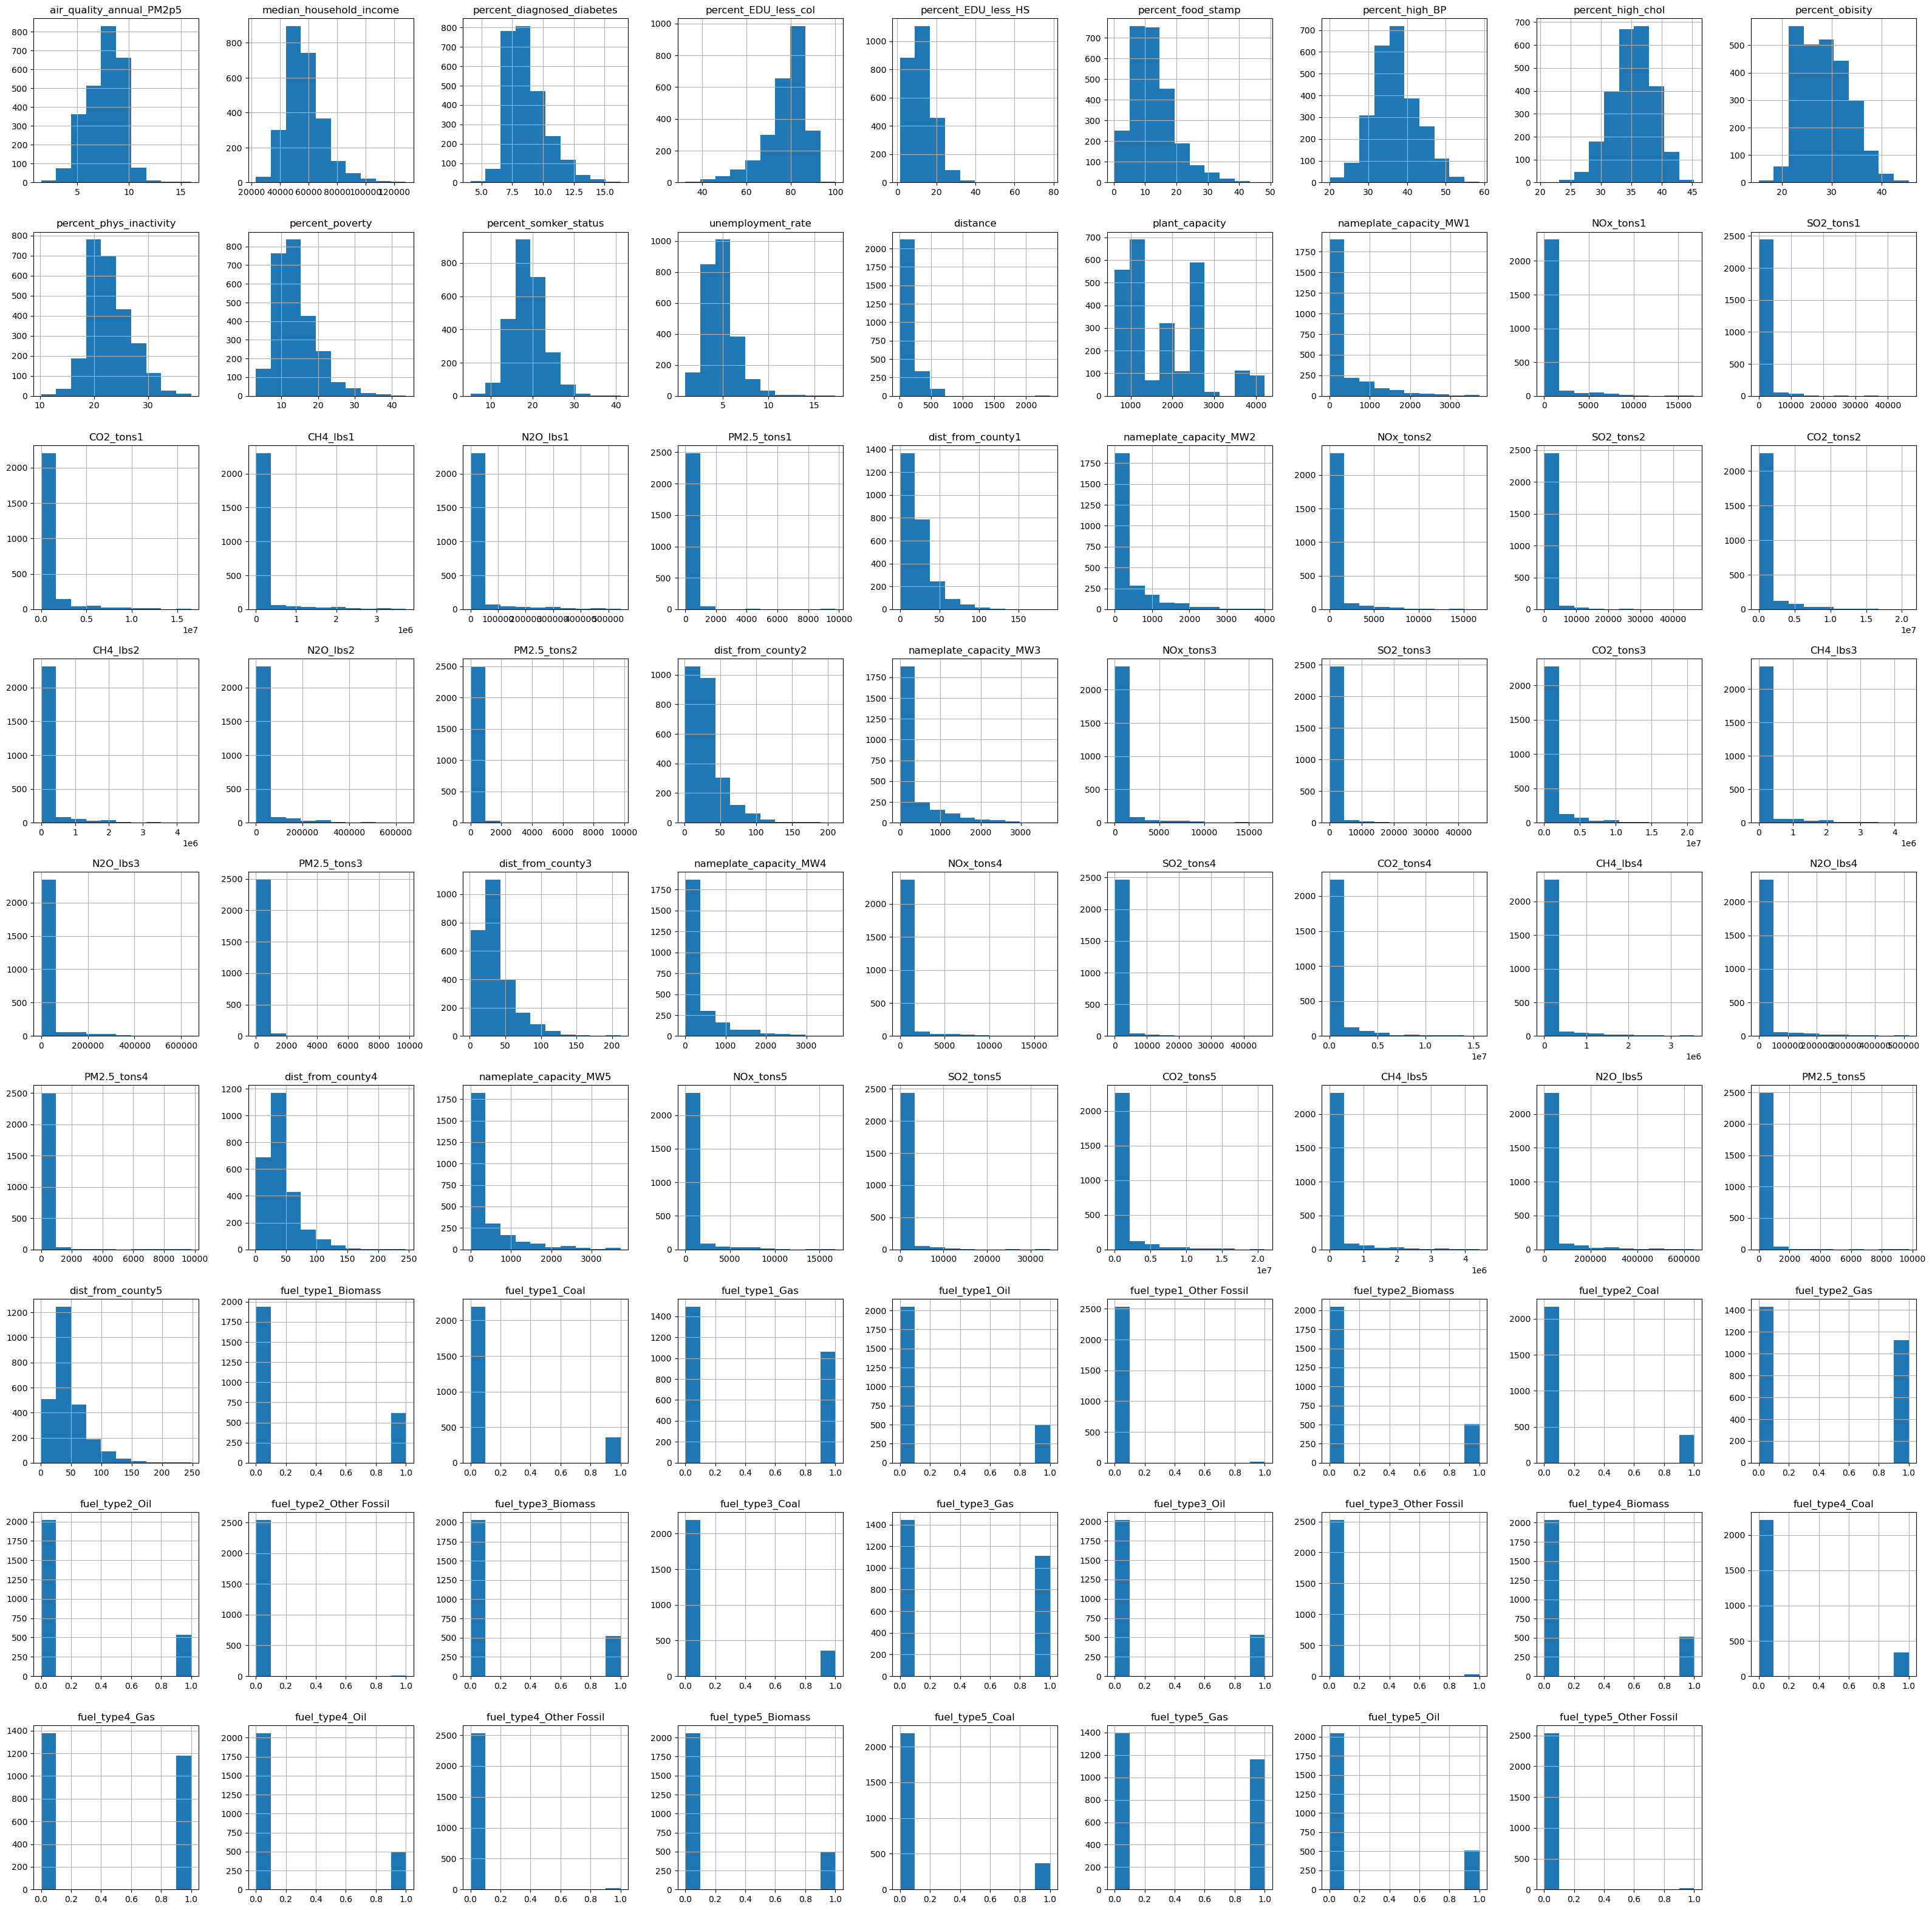

In [149]:
#look at the distribution of features
%matplotlib inline
import matplotlib.pyplot as plt

ML_df[feat_list].hist(figsize=(40,40))
plt.show()

There are several features with just one value (very low variance)

In [164]:
#feature reduction
#changing all distances that are equal to zero to 1 to avoid division by zero
ML_df[["dist_from_county1","dist_from_county2","dist_from_county3","dist_from_county4","dist_from_county5"]].replace(0,1,inplace=True)
ML_df["dist_from_county1"].replace(0,1,inplace=True)

C:\Users\afrap\AppData\Local\Temp\ipykernel_18832\1661558416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML_df[["dist_from_county1","dist_from_county2","dist_from_county3","dist_from_county4","dist_from_county5"]].replace(0,1,inplace=True)


In [165]:
ML_df[["dist_from_county1", "dist_from_county2", "dist_from_county3",
              "dist_from_county4", "dist_from_county5"]].min()

dist_from_county1    1.0
dist_from_county2    1.0
dist_from_county3    1.0
dist_from_county4    1.0
dist_from_county5    1.0
dtype: float64

In [166]:
#feature reduction
# Assigining a distance based pollution
ML_df["CH4_lbs"] = ML_df["CH4_lbs1"]/ML_df["dist_from_county1"]**2+ML_df["CH4_lbs2"]/ML_df["dist_from_county2"]**2+ML_df["CH4_lbs3"]/ML_df["dist_from_county3"]**2+ML_df["CH4_lbs4"]/ML_df["dist_from_county4"]**2+ML_df["CH4_lbs5"]/ML_df["dist_from_county5"]**2
ML_df["N2O_lbs"] = ML_df["N2O_lbs1"].div(ML_df["dist_from_county1"]**2)+ML_df["N2O_lbs2"].div(ML_df["dist_from_county2"]**2)+ML_df["N2O_lbs3"].div(ML_df["dist_from_county3"]**2)+ML_df["N2O_lbs4"].div(ML_df["dist_from_county4"]**2)+ML_df["N2O_lbs5"].div(ML_df["dist_from_county5"]**2)
ML_df["NOx_tons"] = ML_df["NOx_tons1"].div(ML_df["dist_from_county1"]**2)+ML_df["NOx_tons2"].div(ML_df["dist_from_county2"]**2)+ML_df["NOx_tons3"].div(ML_df["dist_from_county3"]**2)+ML_df["NOx_tons4"].div(ML_df["dist_from_county4"]**2)+ML_df["NOx_tons5"].div(ML_df["dist_from_county5"]**2)
ML_df["SO2_tons"] = ML_df["SO2_tons1"].div(ML_df["dist_from_county1"]**2)+ML_df["SO2_tons2"].div(ML_df["dist_from_county2"]**2)+ML_df["SO2_tons3"].div(ML_df["dist_from_county3"]**2)+ML_df["SO2_tons4"].div(ML_df["dist_from_county4"]**2)+ML_df["SO2_tons5"].div(ML_df["dist_from_county5"]**2)
ML_df["CO2_tons"] = ML_df["CO2_tons1"].div(ML_df["dist_from_county1"]**2)+ML_df["CO2_tons2"].div(ML_df["dist_from_county2"]**2)+ML_df["CO2_tons3"].div(ML_df["dist_from_county3"]**2)+ML_df["CO2_tons4"].div(ML_df["dist_from_county4"]**2)+ML_df["CO2_tons5"].div(ML_df["dist_from_county5"]**2)
ML_df["PM2.5_tons"] = ML_df["PM2.5_tons1"].div(ML_df["dist_from_county1"]**2)+ML_df["PM2.5_tons2"].div(ML_df["dist_from_county2"]**2)+ML_df["PM2.5_tons3"].div(ML_df["dist_from_county3"]**2)+ML_df["PM2.5_tons4"].div(ML_df["dist_from_county4"]**2)+ML_df["PM2.5_tons5"].div(ML_df["dist_from_county5"]**2)
ML_df["Nuclear"] = ML_df["plant_capacity"].div(ML_df["distance"])

In [152]:
#ML_df["CH4_lbs"] = ML_df["CH4_lbs1"]/ML_df["dist_from_county1"]+ML_df["CH4_lbs2"]/ML_df["dist_from_county2"]+ML_df["CH4_lbs3"]/ML_df["dist_from_county3"]+ML_df["CH4_lbs4"]/ML_df["dist_from_county4"]+ML_df["CH4_lbs5"]/ML_df["dist_from_county5"]
#ML_df["N2O_lbs"] = ML_df["N2O_lbs1"].div(ML_df["dist_from_county1"])+ML_df["N2O_lbs2"].div(ML_df["dist_from_county2"])+ML_df["N2O_lbs3"].div(ML_df["dist_from_county3"])+ML_df["N2O_lbs4"].div(ML_df["dist_from_county4"])+ML_df["N2O_lbs5"].div(ML_df["dist_from_county5"])
#ML_df["NOx_tons"] = ML_df["NOx_tons1"].div(ML_df["dist_from_county1"])+ML_df["NOx_tons2"].div(ML_df["dist_from_county2"])+ML_df["NOx_tons3"].div(ML_df["dist_from_county3"])+ML_df["NOx_tons4"].div(ML_df["dist_from_county4"])+ML_df["NOx_tons5"].div(ML_df["dist_from_county5"])
#ML_df["SO2_tons"] = ML_df["SO2_tons1"].div(ML_df["dist_from_county1"])+ML_df["SO2_tons2"].div(ML_df["dist_from_county2"])+ML_df["SO2_tons3"].div(ML_df["dist_from_county3"])+ML_df["SO2_tons4"].div(ML_df["dist_from_county4"])+ML_df["SO2_tons5"].div(ML_df["dist_from_county5"])
#ML_df["CO2_tons"] = ML_df["CO2_tons1"].div(ML_df["dist_from_county1"])+ML_df["CO2_tons2"].div(ML_df["dist_from_county2"])+ML_df["CO2_tons3"].div(ML_df["dist_from_county3"])+ML_df["CO2_tons4"].div(ML_df["dist_from_county4"])+ML_df["CO2_tons5"].div(ML_df["dist_from_county5"])
#ML_df["PM2.5_tons"] = ML_df["PM2.5_tons1"].div(ML_df["dist_from_county1"])+ML_df["PM2.5_tons2"].div(ML_df["dist_from_county2"])+ML_df["PM2.5_tons3"].div(ML_df["dist_from_county3"])+ML_df["PM2.5_tons4"].div(ML_df["dist_from_county4"])+ML_df["PM2.5_tons5"].div(ML_df["dist_from_county5"])
#ML_df["Nuclear"] = ML_df["plant_capacity"].div(ML_df["distance"])

In [167]:
ML_df.drop(columns=["CH4_lbs1","CH4_lbs2","CH4_lbs3","CH4_lbs4","CH4_lbs5",
                     "N2O_lbs1","N2O_lbs2","N2O_lbs3","N2O_lbs4","N2O_lbs5",
                     "NOx_tons1","NOx_tons2","NOx_tons3","NOx_tons4","NOx_tons5",
                     "SO2_tons1","SO2_tons2","SO2_tons3","SO2_tons4","SO2_tons5",
                     "CO2_tons1","CO2_tons2","CO2_tons3","CO2_tons4","CO2_tons5",
                     "PM2.5_tons1","PM2.5_tons2","PM2.5_tons3","PM2.5_tons4","PM2.5_tons5",
                     "plant_capacity","distance",
                     "dist_from_county1","dist_from_county2","dist_from_county3","dist_from_county4","dist_from_county5",
                     "nameplate_capacity_MW1","nameplate_capacity_MW2","nameplate_capacity_MW3","nameplate_capacity_MW4","nameplate_capacity_MW5"],inplace=True)

In [168]:
new_feat = [x for x in ML_df.columns if x not in tar_list]
#new_feat

In [169]:
# X and y values
X = ML_df[new_feat]
#X = ML_df[['nameplate_capacity_MW1', 'nameplate_capacity_MW2',
#       'nameplate_capacity_MW3', 'nameplate_capacity_MW4',
#       'nameplate_capacity_MW5', 'fuel_type1_Biomass', 'fuel_type1_Coal',
#       'fuel_type1_Gas', 'fuel_type1_Oil', 'fuel_type1_Other Fossil',
#       'fuel_type2_Biomass', 'fuel_type2_Coal', 'fuel_type2_Gas',
#       'fuel_type2_Oil', 'fuel_type2_Other Fossil', 'fuel_type3_Biomass',
#       'fuel_type3_Coal', 'fuel_type3_Gas', 'fuel_type3_Oil',
#       'fuel_type3_Other Fossil', 'fuel_type4_Biomass', 'fuel_type4_Coal',
#       'fuel_type4_Gas', 'fuel_type4_Oil', 'fuel_type4_Other Fossil',
#       'fuel_type5_Biomass', 'fuel_type5_Coal', 'fuel_type5_Gas',
#       'fuel_type5_Oil', 'fuel_type5_Other Fossil', 'CH4_lbs', 'N2O_lbs',
#       'NOx_tons', 'SO2_tons', 'CO2_tons', 'PM2.5_tons', 'Nuclear']]
y = ML_df[tar_list]

In [170]:
X.columns

Index(['air_quality_annual_PM2p5', 'median_household_income',
       'percent_diagnosed_diabetes', 'percent_EDU_less_col',
       'percent_EDU_less_HS', 'percent_food_stamp', 'percent_high_BP',
       'percent_high_chol', 'percent_obisity', 'percent_phys_inactivity',
       'percent_poverty', 'percent_somker_status', 'unemployment_rate',
       'fuel_type1_Biomass', 'fuel_type1_Coal', 'fuel_type1_Gas',
       'fuel_type1_Oil', 'fuel_type1_Other Fossil', 'fuel_type2_Biomass',
       'fuel_type2_Coal', 'fuel_type2_Gas', 'fuel_type2_Oil',
       'fuel_type2_Other Fossil', 'fuel_type3_Biomass', 'fuel_type3_Coal',
       'fuel_type3_Gas', 'fuel_type3_Oil', 'fuel_type3_Other Fossil',
       'fuel_type4_Biomass', 'fuel_type4_Coal', 'fuel_type4_Gas',
       'fuel_type4_Oil', 'fuel_type4_Other Fossil', 'fuel_type5_Biomass',
       'fuel_type5_Coal', 'fuel_type5_Gas', 'fuel_type5_Oil',
       'fuel_type5_Other Fossil', 'CH4_lbs', 'N2O_lbs', 'NOx_tons', 'SO2_tons',
       'CO2_tons', 'PM2.5_tons'

In [171]:
for i in X.columns:
    change = abs(min(X[i])-max(X[i]))
    if (change >= 1000):
        X[i] = np.log10(X[i].replace(0, 1))

C:\Users\afrap\AppData\Local\Temp\ipykernel_18832\3714487143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = np.log10(X[i].replace(0, 1))


In [175]:
# make test and train data sets and scale them
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
# trying linear regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
eval_line = {}
line = {}
for i in y_train.columns:
    line[i] = LinearRegression()
    line[i].fit(X_train_scaled,y_train[i])
    pred = line[i].predict(X_test_scaled)
    pred_train = line[i].predict(X_train_scaled)
    eval_line[i] = [r2_score(y_train[i],pred_train),r2_score(y_test[i], pred)]
eval_line

{'cardio_death': [0.6147121479337785, 0.6145587662631686],
 'total_cancer': [0.19570290355641184, 0.14854219244798372],
 'bladder': [0.37588141933560903, 0.2963966606405968],
 'brain': [0.4066093087242306, 0.3542108666262265],
 'breast': [0.24136790235097538, 0.21472095772525113],
 'breast_insitu': [0.4604556328915582, 0.4134589293957325],
 'cervix': [0.34461689291744957, 0.2553194595369568],
 'colon': [0.32122424847830433, 0.2955344314877316],
 'esophagus': [0.22308729318188436, 0.17999414145756532],
 'kidney and renal': [0.36555205599443663, 0.28860566564038737],
 'leukemia': [0.3737440007911741, 0.33102934546533735],
 'liver': [0.3536310222452296, 0.29671884629744705],
 'lung': [0.4509945291281876, 0.41967366683218865],
 'melanoma': [0.3670971488848733, 0.3297489829271034],
 'non-hudgkin lymphoma': [0.3993086431545272, 0.3674765323476422],
 'oral cavity': [0.3633122107257374, 0.3008790939775867],
 'ovay': [0.3979272240503796, 0.35513529959321855],
 'pancreas': [0.40217615579697763, 

In [177]:
# trying RF
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
eval_RF = {}
RF={}
for i in y_train.columns:
    RF[i] = RandomForestRegressor(n_estimators=1024)
    RF[i].fit(X_train_scaled,y_train[i])
    pred = RF[i].predict(X_test_scaled)
    pred_train = RF[i].predict(X_train_scaled)
    eval_RF[i] = [r2_score(y_train[i],pred_train),r2_score(y_test[i], pred)]
eval_RF

{'cardio_death': [0.9504040406866499, 0.6475821030794087],
 'total_cancer': [0.9108582349874809, 0.3235514734499685],
 'bladder': [0.9276278400242668, 0.39302407295372266],
 'brain': [0.9257356353914485, 0.44186866263745106],
 'breast': [0.9096604147358613, 0.40115214369114094],
 'breast_insitu': [0.9327771032889238, 0.47571727902032057],
 'cervix': [0.9136579903986809, 0.2959641592538217],
 'colon': [0.9183176640595091, 0.36393914699725194],
 'esophagus': [0.9042683782461539, 0.22040652921949577],
 'kidney and renal': [0.9181891459185346, 0.3389647350471031],
 'leukemia': [0.9202533572331455, 0.3716094380730306],
 'liver': [0.917812463466296, 0.348873368719369],
 'lung': [0.9356852008441395, 0.5265763076286053],
 'melanoma': [0.9224935258502266, 0.42409693182012487],
 'non-hudgkin lymphoma': [0.9229307793994934, 0.47314333292469846],
 'oral cavity': [0.9190038204852738, 0.40028711737295053],
 'ovay': [0.9216055445547773, 0.4741218279990599],
 'pancreas': [0.924755782439194, 0.42247084

In [189]:
# searching with XGboost
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [10, 60, 110,200]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True]

# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'colsample_bytree': [0.6, 0.8, 1.0],
#               'bootstrap': bootstrap}

grid = {'learning_rate' : [0.05, 0.10, 0.20],
          'max_depth' : [10, 60, 110],
          'min_child_weight': [1, 5, 10],  
          'gamma': [0.5, 1, 5],  
          'subsample': [0.6, 0.8, 1.0],  
          'colsample_bytree': [0.6, 0.8, 1.0]
         }
rf_xg={}
eval_xg = {}
import joblib
for i in y_train.columns:
    print(i)
    rf_xg[i] = GridSearchCV(xgboost.XGBRegressor(bootstrap=True,n_estimators=100),grid,refit=True,scoring='r2',cv = 3,verbose=1,n_jobs=-1)
    rf_xg[i].fit(X_train_scaled,y_train[i])
    best_random = rf_xg[i].best_estimator_
    pred = best_random.predict(X_test_scaled)
    pred_train = best_random.predict(X_train_scaled)
    model_str = "./New_XGBoostRG_models/rf_random"+str(i)+".joblib" 
    joblib.dump(best_random, model_str)
    eval_xg[i] = [r2_score(y_train[i],pred_train),r2_score(y_test[i], pred)]
eval_xg

cardio_death
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[01:51:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "bootstrap" } are not used.

total_cancer
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[01:56:12] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "bootstrap" } are not used.

bladder
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[02:00:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "bootstrap" } are not used.

brain
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[02:04:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "bootstrap" } are not used.

breast
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[02:09:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1

{'cardio_death': [0.9231514865394452, 0.6404736101020537],
 'total_cancer': [0.9282311393211329, 0.4065097195831455],
 'bladder': [0.9371579986486563, 0.4015846625709262],
 'brain': [0.9421193948437426, 0.4453798413449598],
 'breast': [0.8214674350794606, 0.42352912793598496],
 'breast_insitu': [0.9205010791782614, 0.4745677711595323],
 'cervix': [0.9244025375702486, 0.30005595327666645],
 'colon': [0.912698518831067, 0.3727417423422287],
 'esophagus': [0.8309403485252154, 0.2872311334122134],
 'kidney and renal': [0.8817875459071077, 0.34094300902222985],
 'leukemia': [0.9192301045381113, 0.3607440141068863],
 'liver': [0.967178009260395, 0.3629046026648375],
 'lung': [0.885090127456159, 0.5307526859574475],
 'melanoma': [0.916577459166151, 0.4381748409339543],
 'non-hudgkin lymphoma': [0.9502501025772386, 0.46452323630237247],
 'oral cavity': [0.9576905074825295, 0.4223780338839279],
 'ovay': [0.8878891823482502, 0.4703481804029268],
 'pancreas': [0.9172844547433181, 0.41647370678268